In [1]:
train_fname = 'train.tsv.zip'
test_fname = 'test.tsv.zip'
sub_fname = 'sampleSubmission.csv'

In [2]:
import pandas as pd

In [3]:
raw_df = pd.read_csv(train_fname, sep='\t')

In [4]:
raw_df

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
...,...,...,...,...
156055,156056,8544,Hearst 's,2
156056,156057,8544,forced avuncular chortles,1
156057,156058,8544,avuncular chortles,3
156058,156059,8544,avuncular,2


In [5]:
test_df = pd.read_csv(test_fname, sep='\t')

In [6]:
test_df

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine
...,...,...,...
66287,222348,11855,"A long-winded , predictable scenario ."
66288,222349,11855,"A long-winded , predictable scenario"
66289,222350,11855,"A long-winded ,"
66290,222351,11855,A long-winded


In [7]:
dropped_rows = test_df[test_df['Phrase'].isna()]

In [8]:
sub_df = pd.read_csv(sub_fname)

In [9]:
sub_df

,PhraseId,Sentiment
0,156061,2
1,156062,2
2,156063,2
3,156064,2
4,156065,2
...,...,...
66287,222348,2
66288,222349,2
66289,222350,2
66290,222351,2


<Axes: xlabel='Sentiment'>

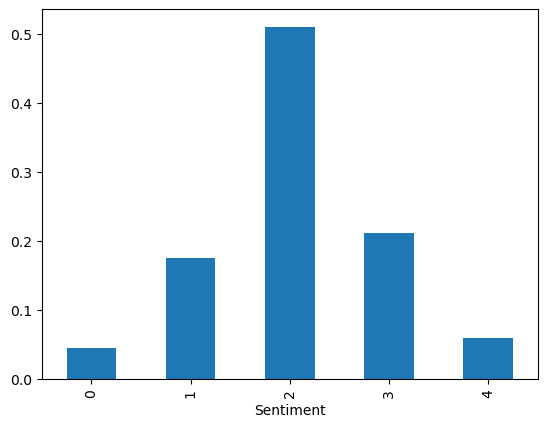

In [10]:
raw_df.Sentiment.value_counts(normalize=True).sort_index().plot(kind='bar')

In [11]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer

In [12]:
nltk.download('punkt')
nltk.download('all')    # Optional: download all NLTK data (large, but ensures everything works)

[nltk_data] Downloading package punkt to /home/xbox2/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /home/xbox2/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /home/xbox2/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /home/xbox2/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /home/xbox2/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /home/xbox2/nltk_data...


True

In [13]:
word_tokenize('Is this (the) real, life?')

['Is', 'this', '(', 'the', ')', 'real', ',', 'life', '?']

In [14]:
stemmer = SnowballStemmer(language='english')

In [15]:
def tokenize(text):
    return [stemmer.stem(token) for token in word_tokenize(text) if token.isalpha()]

In [16]:
tokenize('Is this (the) really life, or is it; fantasy?')

['is', 'this', 'the', 'realli', 'life', 'or', 'is', 'it', 'fantasi']

In [17]:
from nltk.corpus import stopwords

In [18]:
english_stopwords = stopwords.words('english')

In [19]:
', '.join(english_stopwords[:115])

"a, about, above, after, again, against, ain, all, am, an, and, any, are, aren, aren't, as, at, be, because, been, before, being, below, between, both, but, by, can, couldn, couldn't, d, did, didn, didn't, do, does, doesn, doesn't, doing, don, don't, down, during, each, few, for, from, further, had, hadn, hadn't, has, hasn, hasn't, have, haven, haven't, having, he, he'd, he'll, her, here, hers, herself, he's, him, himself, his, how, i, i'd, if, i'll, i'm, in, into, is, isn, isn't, it, it'd, it'll, it's, its, itself, i've, just, ll, m, ma, me, mightn, mightn't, more, most, mustn, mustn't, my, myself, needn, needn't, no, nor, not, now, o, of, off, on, once, only, or, other, our"

In [20]:
selected_stopwords = english_stopwords[:115]

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [22]:
vectorizer = TfidfVectorizer(tokenizer=tokenize,
                             stop_words=selected_stopwords,
                             ngram_range=(1, 2),
                             max_features=2000
                            )

In [23]:
vectorizer.fit(raw_df.Phrase)

/home/xbox2/anaconda3/envs/torch-gpu/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/home/xbox2/anaconda3/envs/torch-gpu/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'could', 'doe', 'dure', 'might', 'must', 'need', 'onc', 'onli'] not in stop_words.
  warnings.warn(


TfidfVectorizer(max_features=2000, ngram_range=(1, 2),
                stop_words=['a', 'about', 'above', 'after', 'again', 'against',
                            'ain', 'all', 'am', 'an', 'and', 'any', 'are',
                            'aren', "aren't", 'as', 'at', 'be', 'because',
                            'been', 'before', 'being', 'below', 'between',
                            'both', 'but', 'by', 'can', 'couldn', "couldn't", ...],
                tokenizer=<function tokenize at 0x7fa5fae29b20>)

In [24]:
len(vectorizer.vocabulary_)

2000

In [25]:
vectorizer.idf_

array([8.69532236, 8.04534735, 8.37303476, ..., 8.1958283 , 8.61419681,
       8.15398119])

In [26]:
vectorizer.get_feature_names_out()[:200]

array(['abandon', 'abil', 'abil to', 'abl', 'abl to', 'abov', 'absolut',
       'absorb', 'abstract', 'absurd', 'accent', 'accept', 'access',
       'accomplish', 'ach', 'achiev', 'across', 'act', 'action',
       'action film', 'action movi', 'action sequenc', 'actor', 'actress',
       'actual', 'ad', 'adam', 'adam sandler', 'adapt', 'add', 'admir',
       'admit', 'adolesc', 'adult', 'adventur', 'affair', 'affect', 'age',
       'ago', 'ahead', 'aim', 'air', 'alien', 'aliv', 'allen', 'allow',
       'almost', 'alon', 'along', 'alreadi', 'also', 'altern', 'although',
       'alway', 'amateurish', 'amaz', 'ambigu', 'ambit', 'ambiti',
       'america', 'american', 'among', 'amount', 'amus', 'analyz',
       'angst', 'ani', 'ani the', 'anim', 'annoy', 'anoth', 'answer',
       'anyon', 'anyon who', 'anyth', 'apart', 'appar', 'appeal',
       'appeal to', 'appear', 'appreci', 'approach', 'area', 'argu',
       'around', 'arriv', 'art', 'artifici', 'artist', 'ask', 'aspect',
       'aspir

In [27]:
raw_df

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
...,...,...,...,...
156055,156056,8544,Hearst 's,2
156056,156057,8544,forced avuncular chortles,1
156057,156058,8544,avuncular chortles,3
156058,156059,8544,avuncular,2


In [28]:
# Transform Training and Test Data into vector
inputs = vectorizer.transform(raw_df.Phrase)

In [29]:
inputs.shape

(156060, 2000)

In [30]:
inputs.toarray()[0][:100]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.22672932, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.27107452, 0.24064156, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [31]:
vocab = vectorizer.vocabulary_

In [32]:
inv_vocab = {v: k for k, v in vocab.items()}

In [33]:
# Get vector for first document
vec = inputs[0].toarray().flatten()

In [34]:
vec

array([0., 0., 0., ..., 0., 0., 0.])

In [35]:
# Print non-zero terms and their weights
for i, val in enumerate(vec):
    if val > 0:
        print(f"{inv_vocab[i]}: {val:.4f}")

also: 0.2267
amount: 0.2711
amus: 0.2406
demonstr: 0.2848
good: 0.3737
much: 0.1903
none: 0.2692
occasion: 0.2636
seri: 0.2475
some: 0.1943
stori: 0.1757
that: 0.1262
the: 0.2492
to: 0.1074
what: 0.1907
which: 0.4031


In [36]:
test_df

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine
...,...,...,...
66287,222348,11855,"A long-winded , predictable scenario ."
66288,222349,11855,"A long-winded , predictable scenario"
66289,222350,11855,"A long-winded ,"
66290,222351,11855,A long-winded


In [37]:
test_df['Phrase'] = test_df['Phrase'].fillna("")

In [38]:
test_df

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine
...,...,...,...
66287,222348,11855,"A long-winded , predictable scenario ."
66288,222349,11855,"A long-winded , predictable scenario"
66289,222350,11855,"A long-winded ,"
66290,222351,11855,A long-winded


In [39]:
test_inputs = vectorizer.transform(test_df.Phrase)

In [40]:
raw_df

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
...,...,...,...,...
156055,156056,8544,Hearst 's,2
156056,156057,8544,forced avuncular chortles,1
156057,156058,8544,avuncular chortles,3
156058,156059,8544,avuncular,2


In [41]:
inputs

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 612720 stored elements and shape (156060, 2000)>

In [42]:
TRAIN_SIZE = 110_000

In [43]:
train_inputs = inputs[:TRAIN_SIZE]
train_targets = raw_df.Sentiment[:TRAIN_SIZE]

In [44]:
train_inputs.shape, train_targets.shape

((110000, 2000), (110000,))

In [45]:
val_inputs = inputs[TRAIN_SIZE:]
val_targets = raw_df.Sentiment[TRAIN_SIZE:]

In [46]:
val_inputs.shape, val_targets.shape

((46060, 2000), (46060,))

In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
model = LogisticRegression()

In [49]:
model.fit(train_inputs, train_targets)

/home/xbox2/anaconda3/envs/torch-gpu/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [50]:
train_preds = model.predict(train_inputs)

In [51]:
train_targets

0         1
1         2
2         2
3         2
4         2
         ..
109995    1
109996    0
109997    1
109998    0
109999    2
Name: Sentiment, Length: 110000, dtype: int64

In [52]:
train_preds

array([3, 2, 2, ..., 0, 0, 2])

In [53]:
from sklearn.metrics import accuracy_score

In [54]:
accuracy_score(train_targets, train_preds)

0.635

In [55]:
val_preds = model.predict(val_inputs)

In [56]:
accuracy_score(val_targets, val_preds)

0.574706904038211

In [57]:
small_df = raw_df.sample(20)

In [58]:
small_df

,PhraseId,SentenceId,Phrase,Sentiment
107906,107907,5707,humor '',2
105562,105563,5573,"disgust , a thrill , or the giggles",2
126806,126807,6818,an intriguing curiosity,4
130087,130088,7007,"Snoots will no doubt rally to its cause , trot...",1
48615,48616,2374,ca n't rescue Brown Sugar from the curse of bl...,1
86156,86157,4459,", melancholy spell",2
109994,109995,5826,It 's a boom-box of a movie that might have be...,0
69991,69992,3562,director John Schultz colors the picture in so...,2
62834,62835,3179,squirming,1
26002,26003,1190,"are so unmemorable , despite several attempts ...",0


In [59]:
small_inputs = vectorizer.transform(small_df.Phrase)

In [60]:
small_inputs.shape

(20, 2000)

In [61]:
small_preds = model.predict(small_inputs)

In [62]:
small_preds

array([3, 2, 3, 4, 1, 2, 1, 3, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [63]:
test_df

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine
...,...,...,...
66287,222348,11855,"A long-winded , predictable scenario ."
66288,222349,11855,"A long-winded , predictable scenario"
66289,222350,11855,"A long-winded ,"
66290,222351,11855,A long-winded


In [64]:
test_inputs

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 235603 stored elements and shape (66292, 2000)>

In [65]:
test_preds = model.predict(test_inputs)

In [66]:
test_preds.shape

(66292,)

In [67]:
sub_df

,PhraseId,Sentiment
0,156061,2
1,156062,2
2,156063,2
3,156064,2
4,156065,2
...,...,...
66287,222348,2
66288,222349,2
66289,222350,2
66290,222351,2


In [68]:
sub_df = sub_df[sub_df['PhraseId'].isin(test_df['PhraseId'])].copy() 

In [69]:
sub_df

,PhraseId,Sentiment
0,156061,2
1,156062,2
2,156063,2
3,156064,2
4,156065,2
...,...,...
66287,222348,2
66288,222349,2
66289,222350,2
66290,222351,2


In [70]:
sub_df.Sentiment = test_preds

In [71]:
sub_df

,PhraseId,Sentiment
0,156061,2
1,156062,2
2,156063,2
3,156064,2
4,156065,2
...,...,...
66287,222348,1
66288,222349,1
66289,222350,2
66290,222351,2


In [72]:
sub_df.to_csv('submission.csv', index=None)

In [73]:
!head submission.csv

PhraseId,Sentiment
156061,2
156062,2
156063,2
156064,2
156065,2
156066,3
156067,3
156068,2
156069,3


In [74]:
sub_df

,PhraseId,Sentiment
0,156061,2
1,156062,2
2,156063,2
3,156064,2
4,156065,2
...,...,...
66287,222348,1
66288,222349,1
66289,222350,2
66290,222351,2
